# Orizon: Correlações entre Exames

Vamos entender como os serviços se relacionam entre si computando a frequencia relativa à cada um deles por ID conta. Por exemplo, para um serviço X, selecionamos todos os id_contas em que ele aparece, e então computamos a frequencia em que os outros serivços aparecem junto deste serviço. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

Lendo os dados para a dataframe:

In [2]:
df = pd.read_csv("../data_30726034.csv", encoding = "ISO-8859-1")
master = "'30726034'"

In [3]:
df.head()

,'categoria','id_cliente','cliente','id_lote','id_conta','guia_prestador','id_item','id_prestador','prestador','cnpj',...,'tipo_item','desc_tipoalta','servico','descricao_despesa','qtde','valor','origem','cnpj_cpf_codnaoperadora_executante','data','ano_mes'
0,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879191','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
1,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879192','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
2,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879192','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
3,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879191','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
4,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879191','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'


In [3]:
df['\'data\''].loc[df['\'servico\''].str.contains(r'^.{4}(?!\d+).*')] = 'Deslocado'
df['\'tipo_item\''].loc[df['\'data\''] == 'Deslocado'] = df['\'desc_tipoalta\''].loc[df['\'data\''] == 'Deslocado']
df['\'servico\''].loc[df['\'data\''] == 'Deslocado'] = df['\'descricao_despesa\''].loc[df['\'data\''] == 'Deslocado']
df['\'descricao_despesa\''].loc[df['\'data\''] == 'Deslocado'] = df['\'qtde\''].loc[df['\'data\''] == 'Deslocado']
df['\'qtde\''].loc[df['\'data\''] == 'Deslocado'] = df['\'valor\''].loc[df['\'data\''] == 'Deslocado']
df['\'valor\''].loc[df['\'data\''] == 'Deslocado'] = df['\'origem\''].loc[df['\'data\''] == 'Deslocado']

Selecionando apenas os campos relevantes para esta análise:

In [4]:
selected_df = pd.concat([df["'id_conta'"], df["'servico'"], df["'descricao_despesa'"], df["'tipo_item'"]], axis=1)

Removendo as aspas das labels para facilitar o trabalho:

In [5]:
selected_df.columns = ["id_conta", "servico", "descricao", "tipo_item"]

Vamos trabalhar apenas com os id_conta atrelados à mais de um serviço:

In [6]:
count_df = selected_df.groupby("id_conta").count()

In [7]:
def get_count(acc_id):
    return count_df.lookup([acc_id], ["servico"])[0]

In [8]:
selected_df["count"] = selected_df["id_conta"].map(get_count)

In [9]:
selected_df = selected_df[selected_df["count"] > 1].drop("count", axis=1)

Algumas observações possuem apenas " no campo serviço, vamos filtra-las também:

In [10]:
selected_df = selected_df[selected_df["servico"] != '"']
selected_df = selected_df[selected_df["servico"] != "''"]

In [13]:
selected_df.head()

,id_conta,servico,descricao,tipo_item
19,'1135853444','30726042','Artrotomia - tratamento cirÃºrgico','PROCEDIMENTO'
20,'1135853444','30726239','Realinhamentos do aparelho extensor - tratame...,'PROCEDIMENTO'
21,'1135853444','30726034','Artroplastia total de joelho com implantes - ...,'PROCEDIMENTO'
22,'1135853446','30726042','Artrotomia - tratamento cirÃºrgico','PROCEDIMENTO'
23,'1135853446','30726239','Realinhamentos do aparelho extensor - tratame...,'PROCEDIMENTO'


O resultado que estamos buscando é uma tabela que mostre, para cada serviço, os serviços que aparecem com mais frequencia junto dele. Para isso, começamos definindo uma função para selecionar apenas os id_conta que contem um dado serviço:

In [11]:
def select_ids_containing_service(service):
    acc_ids = selected_df[selected_df["servico"] == service]["id_conta"].values
    return selected_df.loc[selected_df["id_conta"].isin(acc_ids)]

Agora, definimos uma função para computar as frequencias de cada serviço dentro das dataframes selecionadas pela função acima:

In [12]:
def get_percentage(service, service_df):
    unique_acc_ids = len(service_df["id_conta"].unique())
    count_num = len(service_df[service_df["servico"] == service]["id_conta"].unique())
    return (float(count_num) / unique_acc_ids) * 100.0

E computamos a frequencia relativa a cada serviço principal para cada serviço atrelado. Apenas serviços que constam em mais de 1 id_conta são considerados serviços principais. 

In [13]:
rel_freq_dict = {}
for service in selected_df["servico"].unique():
    rel_freq_dict[service] = []
    service_df = select_ids_containing_service(service)
    if len(service_df["id_conta"].unique()) == 1: # only working with services in more than a single id
        continue
    for related_service in service_df["servico"].unique():
        if related_service == service or related_service == master: # relation to itself and master is always 100%
            continue 
        relative_freq = get_percentage(related_service, service_df)
        rel_freq_dict[service].append((related_service, relative_freq))

E montamos a tabela para exibir nossos resultados:

In [14]:
index = []
for main_service in rel_freq_dict.keys():
    for related_service, freq in rel_freq_dict[main_service]:
        index.append((main_service, related_service))

In [15]:
mul_index = pd.MultiIndex.from_tuples(index, names=('Servico', 'Servicos Correlatos'))

In [16]:
corr_df = pd.DataFrame([freq for service in rel_freq_dict.keys() for (rel_serv, freq) in rel_freq_dict[service]], mul_index, ["%"])

E, para cada serviço principal, ordenamos os serviços relacionados por frequencia relativa:

In [17]:
sorted_df = corr_df.sort_values('%', ascending=False).sort_index(level='Servico', sort_remaining=False)
sorted_df

%
Servico      Servicos Correlatos       
'0000001639' '90090730'           100.0
             '70705330'           100.0
             '70176108'           100.0
             '40804054'           100.0
             '90047249'           100.0
             '10102019'           100.0
             '0000027808'         100.0
             '90094654'           100.0
             '70360812'           100.0
             '70014370'            50.0
             '40302237'            50.0
             '40301630'            50.0
             '90070194'            50.0
             '60018577'            50.0
             '70260290'            50.0
             '90015541'            50.0
             '70135266'            50.0
             '40403408'            50.0
             '40403343'            50.0
             '60034335'            50.0
             '60029188'            50.0
             '60026987'            50.0
             '60025158'            50.0
             '60024119'            50.0
             '60023180'            50.0
             '60017066'            50.0
             '60000333'            50.0
             '0000252026'          50.0
             '0000246369'          50.0
             '40302423'            50.0
...                                 ...
'99999999'   '60034017'            50.0
             '0000153066'          50.0
             '90257294'            50.0
             '90194500'            50.0
             '70705283'            50.0
             '90195752'            50.0
             '70191964'            50.0
             '40805018'            50.0
             '0000057331'          50.0
             '90118987'            50.0
             '60000805'            50.0
             '0000247752'          50.0
             '70850160'            50.0
             '0004075037'          50.0
             '0000036026'          50.0
             '40304345'            50.0
             '90257600'            50.0
             '0000029512'          50.0
             '0000029513'          50.0
             '0000074277'          50.0
             '0005195051'          50.0
             '70904430'            50.0
             '70705313'            50.0
             '90032934'            50.0
             '70259496'            50.0
             '60033541'            50.0
             '60015250'            50.0
             '90291778'            50.0
             '70862044'            50.0
             '0000095033'          50.0

[194376 rows x 1 columns]

Vamos agora preparar visualizações mais claras dos resultados. Primeiro, uma função para pegar a descrição de cada serviço para facilitar a compreensão: 

In [18]:
def get_description(service):
    return selected_df[selected_df["servico"] == service]["descricao"].iloc[0]

E agora selecionamos os 6 serviços que aparecem mais frequentemente junto ao master:

In [19]:
top_services = list(sorted_df.loc[master].head(6).index) # first item is the master itself

E vemos quais foram os serviços que mais apareceram junto a cada um deles:

--------- '40301630': 'CREATININA' ---------


,index,Servicos Correlatos,%,Descricao
0,0,'40302580',100.000000,'URIA'
1,1,'40304361',100.000000,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...
2,2,'40302423',95.454545,'SDIO'
3,3,'40302318',95.454545,'POTSSIO'
4,4,'40302237',81.818182,'MAGNSIO'


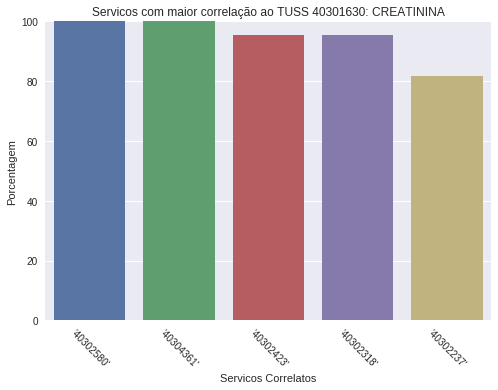

--------- '40302580': 'URIA' ---------


,index,Servicos Correlatos,%,Descricao
0,0,'40304361',100.000000,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...
1,1,'40301630',100.000000,'CREATININA'
2,2,'40302423',95.454545,'SDIO'
3,3,'40302318',95.454545,'POTSSIO'
4,4,'40304590',81.818182,'Tempo de protrombina - determinacao'


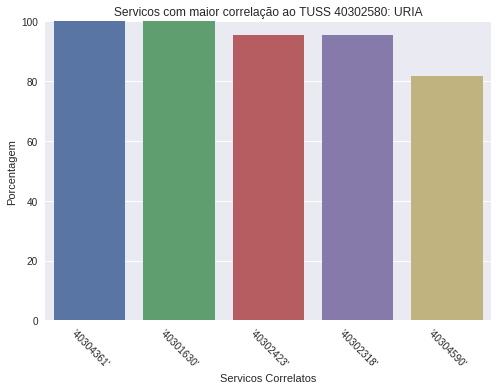

--------- '90196031': 'DIPIRONA 1G AMPOLA 2ML' ---------


,index,Servicos Correlatos,%,Descricao
0,0,'90008332',81.818182,'CEFAZOLINA 1G FRASCO'
1,1,'60023180',63.636364,'TAXA DE SALA DE RECUPERACAO POSANESTESICA'
2,2,'90184378',54.545455,'MIDAZOLAM 5MG AMP. 5ML'
3,3,'70014370',54.545455,'AGULHA DESC. 40 X 12 (BD)'
4,4,'90003551',54.545455,'DEXAMETASONA 4MG/ML FRASCO 2


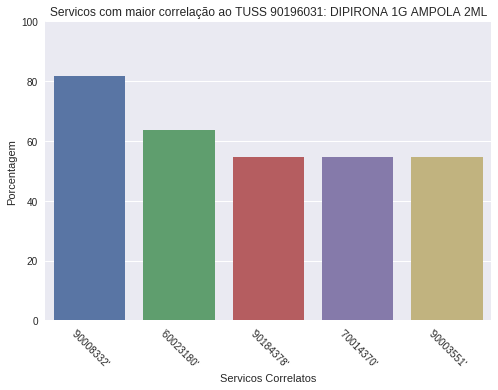

--------- '40304361': 'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ERITR' ---------


,index,Servicos Correlatos,%,Descricao
0,0,'40302580',100.000000,'URIA'
1,1,'40301630',100.000000,'CREATININA'
2,2,'40302423',95.454545,'SDIO'
3,3,'40302318',95.454545,'POTSSIO'
4,4,'40302237',81.818182,'MAGNSIO'


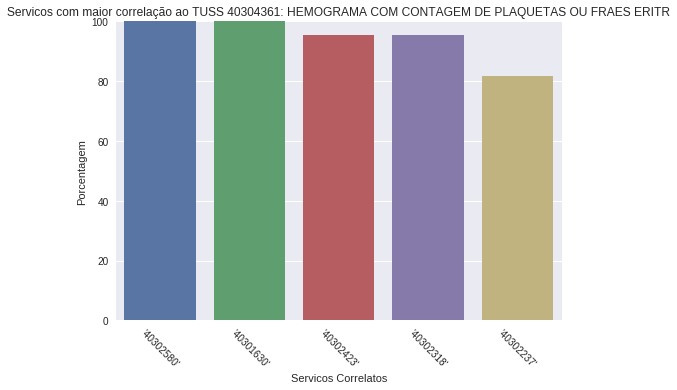

--------- '40302318': 'POTSSIO' ---------


,index,Servicos Correlatos,%,Descricao
0,0,'40302580',100.000000,'URIA'
1,1,'40304361',100.000000,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...
2,2,'40301630',100.000000,'CREATININA'
3,3,'40302423',95.238095,'SDIO'
4,4,'40302237',80.952381,'MAGNSIO'


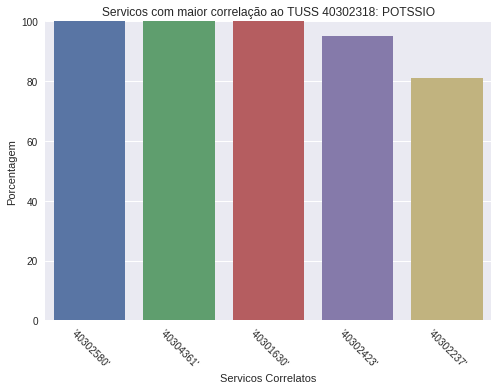

--------- '40302423': 'SDIO' ---------


,index,Servicos Correlatos,%,Descricao
0,0,'40301630',100.000000,'CREATININA'
1,1,'40302580',100.000000,'URIA'
2,2,'40304361',100.000000,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...
3,3,'40302318',95.238095,'POTSSIO'
4,4,'40304590',80.952381,'Tempo de protrombina - determinacao'


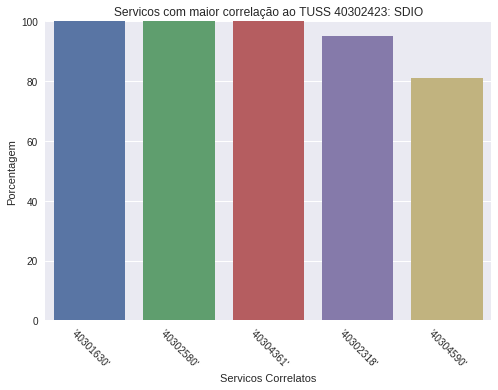

In [20]:
for service in top_services:
    top_service_df = sorted_df.loc[service].head(5)
    top_service_df["Descricao"] = [get_description(item) for item in top_service_df.index]
    top_service_df = top_service_df.reset_index()
    print ("--------- " + service + ": " + get_description(service) +  " ---------") 
    display(top_service_df.reset_index())
    print ("")
    
    #codigo para geração de gŕaficos para cada conjunto de dados
    graph = sns.barplot(y='%',x='Servicos Correlatos',data=top_service_df)
    graph.set_xticklabels(graph.get_xticklabels(),rotation=-45)
    plt.ylabel('Porcentagem')
    plt.title("Servicos com maior correlação ao TUSS "+ service.replace("'",'') + ": " + get_description(service).replace("'",''))
    plt.ylim(0, 100)
    plt.show()
   